In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# Generate sample data as a normal continuous random variable
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# Plot data as well as theoretical mean of 21
fig, ax = plt.subplots()
ax.hist(sample_data, alpha=0.5, label="Sample Data")
ax.axvline(sample_data.mean(), linestyle="--", label=r"Sample Mean $\mu$")
ax.axvline(21, linestyle="--", color="orange", label=r"Theoretical Mean $\mu_{0}$")
ax.set_ylabel("Count")
ax.legend();

In [ ]:
stats.ttest_1samp(sample_data, 21)

In [ ]:
# Data from sportsbettingdime.com
sb_data = pd.read_csv("superbowl.csv")
sb_data.tail()

In [ ]:
coin_toss_counts = sb_data["Coin Toss Outcome"].value_counts().sort_index()
coin_toss_counts

In [ ]:
fig, ax = plt.subplots()

# Extract observed counts
fair_coin_observed = coin_toss_counts.values
# Heads and tails each expected half the time
fair_coin_expected = [sum(coin_toss_counts)/2, sum(coin_toss_counts)/2]

# Placeholder data for display purposes; you can ignore these values
x = np.array([0, 5])
offset = 1
bar_width = 2

# Plot bars
ax.bar(x-offset, fair_coin_observed, bar_width, label="Observed")
ax.bar(x+offset, fair_coin_expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Heads", "Tails"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Coin Tosses");

In [ ]:
fair_coin_result = stats.chisquare(fair_coin_observed, fair_coin_expected)
fair_coin_result

In [ ]:
game_winner_counts_sb = sb_data["Game Winner"].value_counts().sort_index()
game_winner_counts_sb

In [ ]:
fig, ax = plt.subplots()

# Extract data
observed = game_winner_counts_sb.values
expected = [sum(game_winner_counts_sb)/2, sum(game_winner_counts_sb)/2]

# Plot bars
ax.bar(x-offset, observed, bar_width, label="Observed")
ax.bar(x+offset, expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Away Team Wins", "Home Team Wins"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Home-Field Advantage");

In [ ]:
home_field_advantage_result_sb = stats.chisquare(observed, expected)
home_field_advantage_result_sb

In [13]:
# Data from FiveThirtyEight
nfl_data = pd.read_csv("nfl_games.csv")
# Narrow to relevant rows
nfl_data = nfl_data[(nfl_data["neutral"] == 0) & (nfl_data["playoff"] == 0) & (nfl_data["season"] >= 1966 )]
# Engineer a new feature
nfl_data.loc[nfl_data["result1"] == 0, "Game Winner"] = "Away Team"
nfl_data.loc[nfl_data["result1"] == 1, "Game Winner"] = "Home Team"

game_winner_counts_nfl = nfl_data["Game Winner"].value_counts().sort_index()
game_winner_counts_nfl

Game Winner
Away Team    5265
Home Team    7066
Name: count, dtype: int64

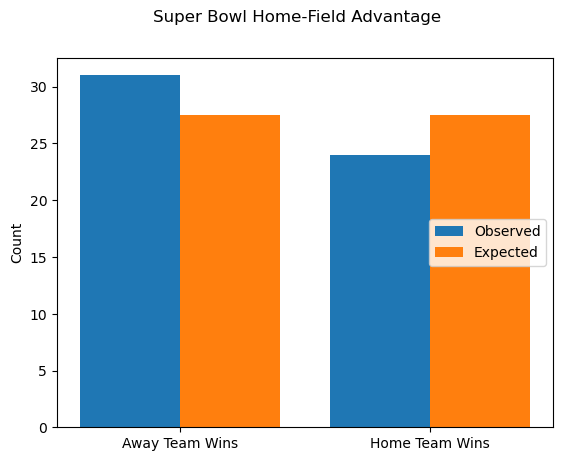

In [14]:
fig, ax = plt.subplots()

# Extract data
observed = game_winner_counts_sb.values
expected = [sum(game_winner_counts_sb)/2, sum(game_winner_counts_sb)/2]

# Plot bars
ax.bar(x-offset, observed, bar_width, label="Observed")
ax.bar(x+offset, expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Away Team Wins", "Home Team Wins"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Home-Field Advantage");